# Example of where Wisdom of the Crowds goes right

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [16]:
p = 0.51 #non-expert's chance of being correct, on an individual basis
crowd = np.logspace(1,4,4) #Crowd sizes: 10, 100, 1000, 10000
print(crowd.astype(int)," Crowd sizes")
expected_correct = crowd*p #crowd size * percentage = expected value. Matches E(X) = np for binomial distribution
print(expected_correct.astype(int), " Expected number of correct votes (5.1 rounded to 5)")
var = expected_correct*(1-p) #variance matches Var(X) = np(1-p) for binomial distribution
stand = np.sqrt(var)
#print(stand)
majority = crowd*0.5 + 1
print(majority.astype(int), " Number of votes needed for majority correct")

[   10   100  1000 10000]  Crowd sizes
[   5   51  510 5100]  Expected number of correct votes (5.1 rounded to 5)
[   6   51  501 5001]  Number of votes needed for majority correct


In [3]:
1 - norm(expected_correct,stand).cdf(majority) #Probability X>=majority approximated by corresponding area under normal curve.
#Each value dependent on crowd size

array([0.28456819, 0.5       , 0.71543181, 0.97617048])

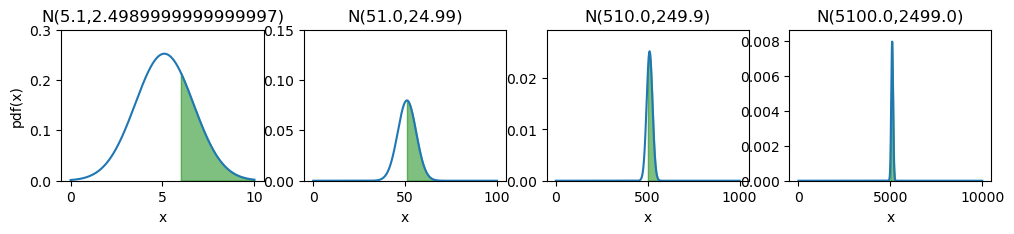

In [5]:
fig, ax = plt.subplots(1,4, dpi=100,figsize=(12, 2))
for i in range(crowd.shape[0]):
    x= np.linspace(0,crowd[i],20000)
    xfill = np.linspace(majority[i],crowd[i],100)
    ax[i].set_title('N(%s,%s)' % (expected_correct[i], var[i]), )
    ax[i].set_xlabel('x')
    if i==0:
        ax[i].set_ylabel('pdf(x)')
    ax[i].fill_between(xfill,norm(expected_correct[i],stand[i]).pdf(xfill),alpha=0.5, color='g')
    ax[i].plot(x, norm(expected_correct[i],stand[i]).pdf(x))
    ax[i].set_ylim(0,0.30/(i**3.2+1))
plt.show()

# Example of where Wisdom of the Crowds goes wrong

In [7]:
q = 0.49
expect_less = crowd*q #crowd size * percentage = expected value. Matches E(X) = np for binomial distribution
#Variance is the same in this case
#Majority is also the same
1 - norm(expect_less,stand).cdf(majority)

array([0.24326443, 0.34454879, 0.24326443, 0.02167074])

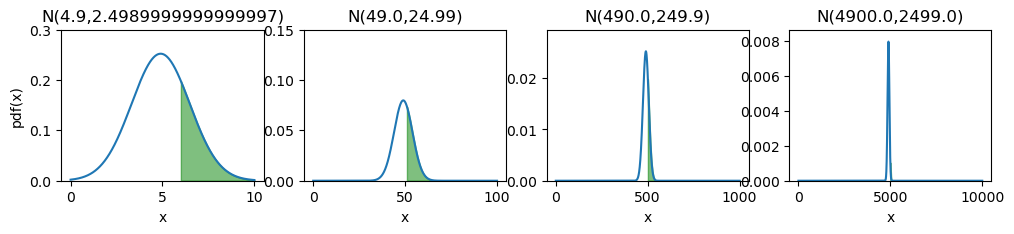

In [8]:
fig, ax = plt.subplots(1,4, dpi=100,figsize=(12, 2))
for i in range(crowd.shape[0]):
    x= np.linspace(0,crowd[i],20000)
    xfill = np.linspace(majority[i],crowd[i],100)
    ax[i].set_title('N(%s,%s)' % (expect_less[i], var[i]), )
    ax[i].set_xlabel('x')
    if i==0:
        ax[i].set_ylabel('pdf(x)')
    ax[i].fill_between(xfill,norm(expect_less[i],stand[i]).pdf(xfill),alpha=0.5, color='g')
    ax[i].plot(x, norm(expect_less[i],stand[i]).pdf(x))
    ax[i].set_ylim(0,0.30/(i**3.2+1))
plt.show()